# <a id='toc1_'></a>[Dataproject – How good are house representatives when investing?](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Dataproject – How good are house representatives when investing?](#toc1_)    
  - [Members](#toc1_1_)    
  - [Introduction](#toc1_2_)    
- [Read and clean data](#toc2_)    
  - [Explore each data set](#toc2_1_)    
- [Clean House data](#toc3_)    
- [Merge data sets](#toc4_)    
- [Analysis](#toc5_)    
  - [Choose A Representative!](#toc5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->



## <a id='toc1_1_'></a>[Members](#toc0_)
- Johan Ølgaard
- Alon Clausen
- Valdemar Guldager

## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Background for the project**\
It is a widespread belief that some House representatives in the USA might leverage privileged information obtained through their political positions to gain an advantage in the stock market thus, violating the STOCK (Stop Trading on Congressional Knowledge) Act from 2012. Most recently Insider together with several other news outlets found that [78 members of congress had violated the STOCK Act](https://www.businessinsider.com/congress-stock-act-violations-senate-house-trading-2021-9?r=US&IR=T&utm_source=copy-link&utm_medium=referral&utm_content=topbar). In order to foster transparency and shed light on this subject, this project aims to visualize the portfolio returns of US House representatives.

By amalgamating data related to their stock transactions with historic stock prices, we provide an analysis of their investments' performance. This will help understanding the effectiveness of their investment decisions and shed light on whether or not it seems plausible that some might be in violation with the STOCK Act based on their portfolio's performance.


**Import of libraries**

In [1]:
# a. import libraries
import yfinance as yf
import dataproject as dp
import ipywidgets as wg

# b. autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# <a id='toc2_'></a>[Read and clean data](#toc0_)

In this project, we read and clean the data from the House Stock Watcher using a two-step approach:

- Fetching the data: We use the ```fetch_data``` function to obtain stock transaction data of US House representatives from the JSON-file and store relevant fields in a pandas dataframe.

- Cleaning the data: We apply the ```clean_data``` function to preprocess and clean the obtained data. This involves handling missing values, cleaning and reformatting columns (such as dates, tickers, amounts, and text), removing options trades, and calculating average transaction amounts.

## <a id='toc2_1_'></a>[Explore each data set](#toc0_)

To gain an understanding of the two datasets, we first present them in their raw, unprocessed format. This allows us to inspect the initial structure and content before any cleaning or manipulation, ensuring that we are working with accurate and relevant data for our analysis.

In [2]:
# a. fetch the data for the house representatives
house_raw = dp.fetch_data(print_df = True)

# b. fech example data from yfinance
example_yf = yf.download("AAPL", "2022-03-01", "2022-03-14", interval="1d")

display(example_yf)


request successful


,date,ticker,amount,action,representative,party,description
0,2021-09-27,BP,"$1,001 - $15,000",purchase,Virginia Foxx,Republican,BP plc
1,2021-09-13,XOM,"$1,001 - $15,000",purchase,Virginia Foxx,Republican,Exxon Mobil Corporation
2,2021-09-10,ILPT,"$15,001 - $50,000",purchase,Virginia Foxx,Republican,Industrial Logistics Properties Trust - Common...
3,2021-09-28,PM,"$15,001 - $50,000",purchase,Virginia Foxx,Republican,Phillip Morris International Inc
4,2021-09-17,BLK,"$1,001 - $15,000",sale_partial,Alan S. Lowenthal,Democrat,BlackRock Inc
...,...,...,...,...,...,...,...
16976,2020-04-09,SWK,"$1,001 - $15,000",sale_partial,Ed Perlmutter,Democrat,"Stanley Black & Decker, Inc."
16977,2020-04-09,USB,"$1,001 - $15,000",sale_partial,Ed Perlmutter,Democrat,U.S. Bancorp
16978,2020-03-13,BMY,"$100,001 - $250,000",sale_full,Van Taylor,Republican,Bristol-Myers Squibb Company
16979,2020-03-13,LLY,"$500,001 - $1,000,000",sale_full,Van Taylor,Republican,Eli Lilly and Company


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217331,83474400
2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557098,79724800
2022-03-03,168.470001,168.910004,165.550003,166.229996,165.229095,76678400
2022-03-04,164.490005,165.550003,162.100006,163.169998,162.187515,83737200
2022-03-07,163.360001,165.020004,159.039993,159.300003,158.340820,96418800
2022-03-08,158.820007,162.880005,155.800003,157.440002,156.492004,131148300
2022-03-09,161.479996,163.410004,159.410004,162.949997,161.968842,91454900
2022-03-10,160.199997,160.389999,155.979996,158.520004,157.565506,105342000
2022-03-11,158.929993,159.279999,154.500000,154.729996,153.798340,96970100


# <a id='toc3_'></a>[Clean House data](#toc0_)

The ```clean_data``` function preprocesses and cleans the raw transaction data from the House or Senate Stockwatcher jSON file. The function performs the following tasks:

- Cleans and formats columns such as amount, date, ticker, action, representative, party, and description.
- Handles missing and invalid values, as well as unwanted characters.
- Removes options trades, representatives with no purchases and updates stock tickers (e.g, Facebook's ticker change in 2022).
- Calculates the average transaction amount as the representatives are not required to disclose the precise value of their stock purchases. 
    - This is a rough estimate but a assumption that is necessary to proceed with our project.

In [3]:
# a. clean the data
house_clean = dp.clean_data(house_raw, print_df = True)

12 invalid dates dropped
1719 invalid tickers dropped
76 options trades dropped
44 representatives dropped because they have not made any purchases


,date,ticker,action,representative,party,description,min_amount,max_amount,amount
0,2021-06-01,LHX,purchase,Abigail Spanberger,dem,L3Harris Special Stock Grant,1001.0,15000.0,8000.5
1,2022-09-01,LHX,purchase,Abigail Spanberger,dem,L3Harris Technolgies - Spouse granted RSU as p...,1001.0,15000.0,8000.5
2,2023-03-02,LHX,sale_full,Abigail Spanberger,dem,L3Harris Technologies Inc,1001.0,15000.0,8000.5
3,2020-04-23,AAL,purchase,Adam Kinzinger,rep,"American Airlines Group, Inc.",1001.0,15000.0,8000.5
4,2020-04-23,AAL,sale_full,Adam Kinzinger,rep,"American Airlines Group, Inc.",1001.0,15000.0,8000.5
...,...,...,...,...,...,...,...,...,...
14897,2020-03-23,WPC,sale_full,Zoe Lofgren,dem,W. P. Carey Inc. REIT,1001.0,15000.0,8000.5
14898,2020-03-23,XEL,sale_full,Zoe Lofgren,dem,Xcel Energy Inc.,1001.0,15000.0,8000.5
14899,2020-03-23,ZTS,sale_full,Zoe Lofgren,dem,Zoetis Inc. Class A,1001.0,15000.0,8000.5
14900,2021-08-09,ZTS,purchase,Zoe Lofgren,dem,Zoetis Inc Class A,1001.0,15000.0,8000.5


# <a id='toc4_'></a>[Merge data sets](#toc0_)

- First we narrow down our dataset to only look at 1 representative with ```dp.select_rep```. This function filters down the data to the chosen representative.
- Next the function ```dp.get_stock_data``` creates a list of all stock tickers in the filtered data and finds the min date. With this it pulls the Adj. Close price for each day for each ticker from Yahoo Finance for the period min date until today.
- The function ```dp.merge_data``` then merges the two dataframes with a right outerjoin on date and ticker to include all days where markets have been open. After this we remove all data for each ticker before the first registered purchase of a stock

In [4]:
# a. select the data for a specific representative
rep_df = dp.select_rep(house_clean, "Nancy Pelosi", print_df = False)

# b. get the stock data for the selected representative
stocks_price = dp.get_stock_data(rep_df, print_df = False)

# c. merge the data
df_merge = dp.merge_data(rep_df, stocks_price, print_df = True)


[*********************100%***********************]  22 of 22 completed

1 Failed download:
- WORK: No timezone found, symbol may be delisted


,date,ticker,price,action,amount
0,2021-05-21,AAPL,124.148651,purchase,175000.5
1,2021-05-24,AAPL,125.801598,none,NaN
2,2021-05-25,AAPL,125.603638,none,NaN
3,2021-05-26,AAPL,125.554146,none,NaN
4,2021-05-27,AAPL,124.000175,none,NaN
...,...,...,...,...,...
8279,2023-04-10,RBLX,46.430000,none,NaN
8280,2023-04-11,RBLX,46.060001,none,NaN
8281,2023-04-12,RBLX,45.200001,none,NaN
8282,2023-04-13,RBLX,45.700001,none,NaN


# <a id='toc5_'></a>[Analysis](#toc0_)

- With information on purchases, sales and prices we can now recreate the portfolio with ```dp.portfolio``` under a few assumptions;
   - Their portfolio is empty when beginning, thus no stock enters before a purchase is made and all sales before are disregarded
   - *Purchase*; the representative is assumed to have purchased the shares at the adjust close value. The amount spend on the shares is the average between the ```min_amount``` and ```max_amount```.
    - *Partial sale*; will always be a sale of 50 % of the shares of the given stock.
    - *Full sale*; will sell all stocks of the given ticker
- From the *synthetic* portfolio that we have created, we can calculate the weighted return for each stock, and thus the portfolio return for any given day. This is done with the function ```dp.daily_return```.
- Lastly we plot the cummulated return on the portfolio against the cummulated return of the S&P 500 for the same period with ```dp.plot_return```

[*********************100%***********************]  1 of 1 completed


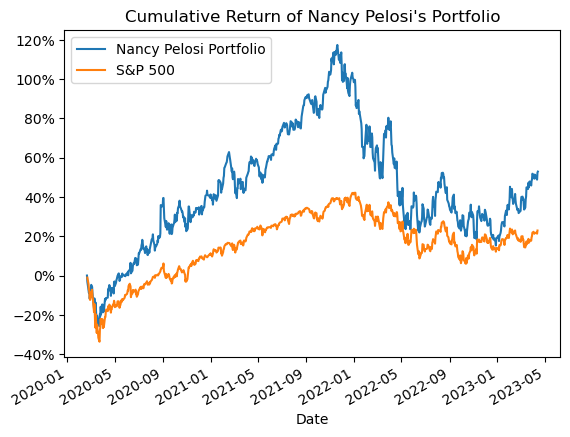

In [5]:
# a. calculate portfolio
portfolio_df = dp.portfolio(df_merge, print_df = False)

# b. calculate daily return
daily_return = dp.daily_return(portfolio_df, print_df = False)

# c. plot cummulated return
dp.plot_return(daily_return, include_sp500=True)

As seen from above Nancy Pelosi has done quite well for the past couple of years beating the S&P 500.

## <a id='toc5_1_'></a>[Choose your own Representative!](#toc0_)

Below we have created a widget allowing you to select a house representative and see how they have done compared to the S&P 500. Spoiler alert, some of them are consistenly beating the S&P 500. (Try Dan Crenshaw.)




In [6]:
# a. create the dropdown widget
reps = house_clean["representative"].unique().tolist()
reps.insert(0, "Click here")

rep_selector = wg.Dropdown(
    options=reps, 
    description='Choose your Representative:',
    layout=wg.Layout(width='max-content')  # Set the layout to adjust the width
)

rep_selector.style = {'description_width': 'initial'}

# b. create the plot and udpate it when the dropdown changes
if __name__ == "__main__":
    dp.display(rep_selector)

    # Observe the changes in the dropdown and update the plot accordingly
    rep_selector.observe(
        lambda change: dp.widget(house_clean,change.new) if change.name == 'value' else None, names='value'
        )


Dropdown(description='Choose your Representative:', layout=Layout(width='max-content'), options=('Click here',…